# Exploratory Analysis on Fresno Housing Prices in 2020


In [2]:
import pandas as pd

import re 
import numpy as np

df = pd.read_csv('HousingPrices_Unfiltered.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Title                             2824 non-null   object
 1   Title_link                        2824 non-null   object
 2   Thumbnail                         2824 non-null   object
 3   Box-sc-8ox7qa-0                   2824 non-null   object
 4   Text__TextBase-sc-1i9uasc-0-div   2824 non-null   object
 5   Text__TextBase-sc-1i9uasc-0-div1  2824 non-null   object
 6   Text__TextBase-sc-1i9uasc-0-div2  2824 non-null   object
 7   Text__TextBase-sc-1i9uasc-0-div3  2824 non-null   object
 8   SSeMC                             2776 non-null   object
 9   Padding-sc-1d43y5s-01             2470 non-null   object
 10  cERLyX                            2472 non-null   object
 11  Field2                            2413 non-null   object
 12  Field3              

As we can see, the column names are quite inconsistent and do not tell us anything




In [4]:
df = df.rename(columns={"Title" : "Address", "Title_link" : "Zipcode", "Box-sc-8ox7qa-0" : "Date Sold", "Text__TextBase-sc-1i9uasc-0-div" : "Sold Price", "Text__TextBase-sc-1i9uasc-0-div1" : "Bed","Text__TextBase-sc-1i9uasc-0-div2" : "Bath", "Text__TextBase-sc-1i9uasc-0-div3" : "Square foot", "Padding-sc-1d43y5s-01": "Neighborhood"})

The column "thumbnail" only provides us a link to the photo of the house, so we do not need it.

In addition, because we are trends of housing prices by zipcode, we want to create a new column with just the zipcode of the house. At the end of every URL for the housing website we scraped, the zipcode is always in the same place:


In [5]:
df = df.drop(columns = ['Thumbnail'])
df = df.dropna(subset=['Zipcode'])
df['Zipcode'] = df['Zipcode'].apply(lambda x: x.split('-')[-3])


We are also creating a new column named Single Family Residence (SFR for short). We can differntiate these buildings from studios or build complex that contain multiple houses. 

In [6]:
df['SFR'] = df['Bed'].apply(lambda x: False if 'Studio' in x or '1bd'in x else True)

We then define two functions, lot fix and build fix. Because of the housing website that we scraped our data from, some houses have more information than other houses. Majority of the houses have a date of when the house was first built but the information was placed in different columns based off how much information each house had on the housing website. 

In [7]:
cols = list(df.columns)

In [8]:
def lot_fix (c1, c2, c3, c4, c5):
    if 'Lot' in str(c1):
        return c1[9:-4]
    if 'Lot' in str(c2):
        return c2[9:-4]
    if 'Lot' in str(c3):
        return c3[9:-4]
    if 'Lot' in str(c4):
        return c4[9:-4]
    if 'Lot' in str(c5):
        return c5[9:-4]
    else:
        return "-1"

In [9]:
def built_fix(c1, c2, c3, c4, c5):
    if 'Built' in str(c1):
        return c1
    if 'Built' in str(c2):
        return c2
    if 'Built' in str(c3):
        return c3
    if 'Built' in str(c4):
        return c4
    if 'Built' in str(c5):
        return c5
    else:
        return "-1"

In [10]:
df['Lot Size'] = df.apply(lambda x: lot_fix(x.SSeMC, x.Neighborhood, x.cERLyX, x.Field2, x.Field3), axis = 1)

In [11]:
df['Age of Building'] = df.apply(lambda x: built_fix(x.SSeMC, x.Neighborhood, x.cERLyX, x.Field2, x.Field3), axis=1)

## Data cleaning and formatting

All of the columns have to be cleaned in order for us to do analysis on the data.

In [12]:
df['Zipcode'] = df['Zipcode'].apply(lambda x: x if x.isdigit() else np.nan)
df = df.dropna(subset=['Zipcode'])

In [13]:
df['Age of Building'] = df['Age of Building'].apply(lambda x: x.split(' ')[-1])

In [14]:
df['Age of Building'] = df['Age of Building'].apply(lambda x: int(x) if int(x) < 1 else 2020 - int(x))

In [15]:
df['Date Sold'] = df['Date Sold'].apply(lambda x: x[3:])

In [16]:
df['Bed'] = df['Bed'].apply(lambda x: x[:-2] if x != "Studio" and x != 0 else "Studio")

In [17]:
df['Bath'] = df['Bath'].apply(lambda x: x[:-2] if "ba" in x else "1")

In [18]:
df['Square foot'] = df['Square foot'].apply(lambda x: x[:-4] if "sqft" in x else "-1")    

In [19]:
df['Sold Price'] = df['Sold Price'].apply(lambda x: x[1:] if x[:1] == '$' else "-1")

In [20]:
df = df.drop(columns=['SSeMC', 'Neighborhood', 'cERLyX', 'Field2', 'Field3'])

In [21]:
df['Sold Price'] = df['Sold Price'].apply(lambda x: x.strip())

In [22]:
df['Sold Price'] = df['Sold Price'].apply(lambda x: x.replace(',',''))

In [23]:
df['Sold Price'] = df['Sold Price'].apply(lambda x: int(x))

In [24]:
df['Square foot'] = df['Square foot'].apply(lambda x: x.replace(',',''))

In [25]:
df = df.astype({'Sold Price': 'float64','Square foot':'int64'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2829
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          2800 non-null   object 
 1   Zipcode          2800 non-null   object 
 2   Date Sold        2800 non-null   object 
 3   Sold Price       2800 non-null   float64
 4   Bed              2800 non-null   object 
 5   Bath             2800 non-null   object 
 6   Square foot      2800 non-null   int64  
 7   SFR              2800 non-null   bool   
 8   Lot Size         2800 non-null   object 
 9   Age of Building  2800 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 221.5+ KB


## Feature Engineering

In this section, I create new columns that I think would best aid the dataset in showing disparities in zipcodes in the central valley. Because there are many hidden factors that could affect the housing neighborhood (placement of freeways, factories, parks, schools, grocery stores, etc.), it is important to highlight these factors so we could get a better picture of why housing prices differ greatly depending on where the house is located.

As of now, I have researched two factors that could affect housing prices, these were: the number of parks located in a neighborhood and the number of sexual predators in a neighborhood.

In [27]:
def park_function(zipcode):
    if '93619' in zipcode:
        return 7
    elif '93611' in zipcode:
        return 6
    elif '93612' in zipcode:
        return 7
    elif '93710' in zipcode:
        return 4
    elif '93720' in zipcode:
        return 4
    elif '93726' in zipcode:
        return 8
    elif '93727' in zipcode:
        return 7
    elif '93711' in zipcode:
        return 5
    elif '93704' in zipcode:
        return 2
    elif '93702' in zipcode:
        return 2
    elif '93703' in zipcode:
        return 3
    elif '93728' in zipcode:
        return 1
    else: return 0

def so_function(zipcode):
    if '93619' in zipcode:
        return 0
    elif '93611' in zipcode:
        return 24
    elif '93612' in zipcode:
        return 67
    elif '93710' in zipcode:
        return 60
    elif '93720' in zipcode:
        return 31
    elif '93726' in zipcode:
        return 94
    elif '93727' in zipcode:
        return 103
    elif '93711' in zipcode:
        return 29
    elif '93704' in zipcode:
        return 93
    elif '93705' in zipcode:
        return 100
    elif '93706' in zipcode:
        return 176
    elif '93737' in zipcode:
        return 5
    elif '93725' in zipcode:
        return 54
    elif '93702' in zipcode:
        return 101
    elif '93703' in zipcode:
        return 92
    elif '93728' in zipcode:
        return 77
    elif '93722' in zipcode:
        return 163
    else: 
        return 0

In [28]:
df['Parks'] = df['Zipcode'].apply(park_function)
df['SexualOffenders'] = df['Zipcode'].apply(so_function)

## Visualizations


In [28]:
import matplotlib.pyplot as plt
from numpy import median
import seaborn as sns

In [29]:
num_houses_zipcode = df['Zipcode'].value_counts()
num_houses_zipcode =num_houses_zipcode.sort_values()

In [30]:
houses_zipcode = pd.DataFrame({'Zipcode':num_houses_zipcode.index, 'Num of Houses':num_houses_zipcode.values})

Majority of the homes that were sold in 2019-2020 in Fresno were in the zipcode 93619. The reason for this is due to new development in the area where there have been an influx of homes being built.

Text(0.5, 1.0, 'Num of houses by zipcode')

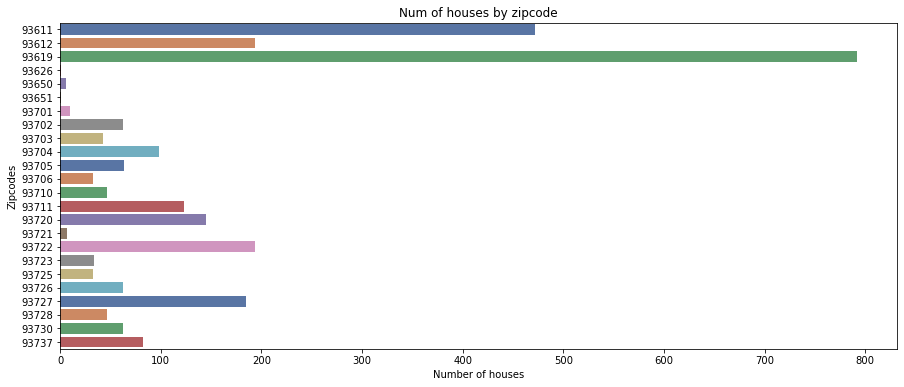

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax = sns.barplot(x=num_houses_zipcode.values, y=num_houses_zipcode.index, orient='h', palette='deep')

ax.set_ylabel('Zipcodes')
ax.set_xlabel('Number of houses')
ax.set_title('Num of houses by zipcode')

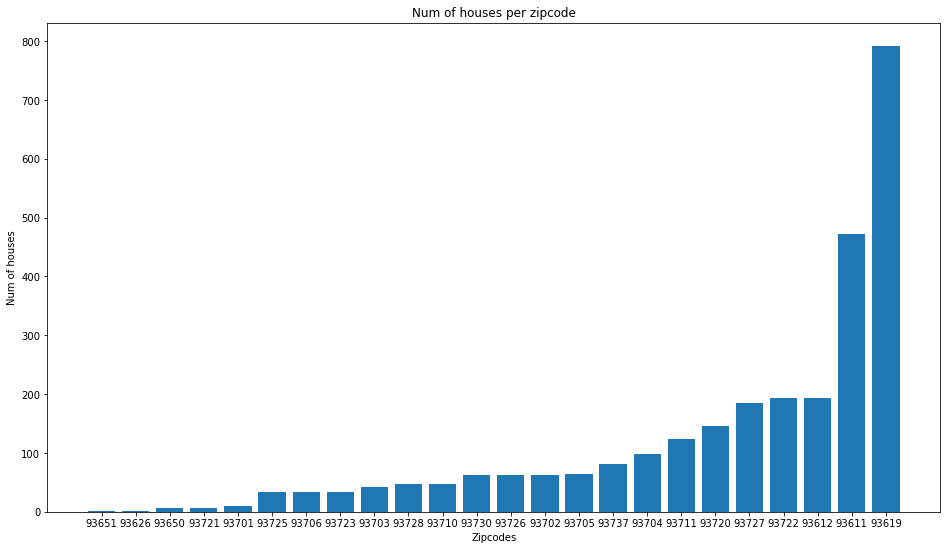

In [32]:
fig = plt.figure(figsize = (16,9))
plt.bar( num_houses_zipcode.index, num_houses_zipcode.values)

plt.xlabel("Zipcodes")
plt.ylabel("Num of houses")
plt.title("Num of houses per zipcode")
plt.show()

In [33]:
df['SexualOffenders']

0       163
1        31
2         0
3       163
4        31
       ... 
2825      0
2826      0
2827     24
2828      0
2829      0
Name: SexualOffenders, Length: 2800, dtype: int64

In [34]:
df['Sold Price']

0       350000.0
1       580000.0
2       905000.0
3       135000.0
4       440000.0
          ...   
2825        -1.0
2826    665000.0
2827    330000.0
2828    380000.0
2829    441500.0
Name: Sold Price, Length: 2800, dtype: float64

In [35]:
avgprice_zipcode = df['Sold Price'].groupby(df.Zipcode).mean().sort_values(ascending=False)

In [36]:
avgprice_zipcode = avgprice_zipcode.to_frame()

In [37]:
avgprice_zipcode=avgprice_zipcode.merge(houses_zipcode, on='Zipcode', how='left')

It's important to note that while the zipcode 93651 had the highest average price sold, there was only one house that was sold in that zipcode. Additionally zipcode 93626 had only one house sold.

In [38]:
avgprice_zipcode['Zipcode'] = avgprice_zipcode['Zipcode'].apply(lambda x: x if x not in ('93651','93626') else np.nan)

In [39]:
avgprice_zipcode = avgprice_zipcode.dropna(subset=['Zipcode'])

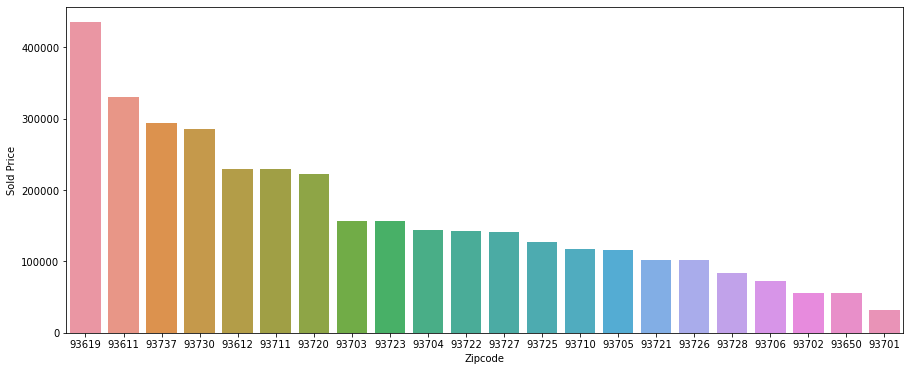

In [40]:
plt.figure(figsize=(15,6))
price_chart = sns.barplot(x=avgprice_zipcode.Zipcode, y=avgprice_zipcode['Sold Price'], order=avgprice_zipcode.Zipcode, data=avgprice_zipcode)
plt.show()

In [41]:
so_zipcode = df['SexualOffenders'].groupby(df.Zipcode).mean().sort_values(ascending=False)

In [42]:
so_zipcode = so_zipcode.dropna()

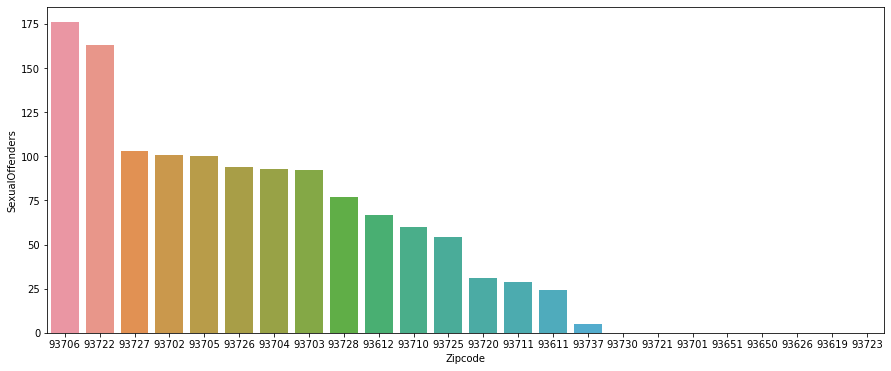

In [43]:
plt.figure(figsize=(15,6))
zipcode_chart = sns.barplot(x=so_zipcode.index, y=so_zipcode, order = so_zipcode.index ,data=df)
plt.show()

The zipcode that contains the highest number of sexual offenders living in the area (93706) had one of the lowest average price of houses sold in this area, and the houses that had the highest average price of houses sold in the area (93619) had 0 sexual offenders living in the area. 

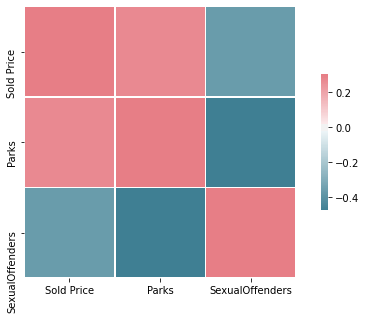

In [44]:
plt.figure(figsize=(9,5))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['Sold Price', 'Zipcode', 'Parks', 'SexualOffenders']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

As shown in this heat map, the number of sexual offenders had a negative correlation with the average price of a sold home and the number of parks in the area while the number of parks had a positive correlation with the average price of a sold home. 

### Why are these two new features relevant in analyzing housing prices?

There are laws that keep the majority of registered sex offenders in certain areas of the city. One law is Jessica's Law of 2006. This law enforces that all sexual offenders had to live at least 2,000 feet away from schools and parks. This causes a strong indirect correlation with housing prices and parks. Those who are not able to afford houses in areas that have higher number of parks and lower number of sexual offenders are forced to live in areas that are underfunded. These laws have created systematic segregation between poor and affluent communities - families do not have a choice of where their homes are located when chosing to rent or buy a house.

## Prepping data for predicting the housing prices in Fresno
Will be using the mean absolute error to measure the performance of our model

In [45]:
df = df.loc[df['Bed'] != "Studio"]

In [46]:
df = df.loc[df['Sold Price'] != -1]

In [47]:
df['Lot Size'] = df['Lot Size'].apply(lambda x: int((x.strip()).replace(',','')) if 'a' not in x else round((float(x[:-1].strip())) * 43560))

In [48]:
df.loc[(df['Lot Size'] == -1) | (df['Square foot'] == -1) | (df['Age of Building'] == -1)]

,Address,Zipcode,Date Sold,Sold Price,Bed,Bath,Square foot,SFR,Lot Size,Age of Building,Parks,SexualOffenders
1,9446 N Ashurst Dr,93720,Aug-20,580000.0,4,3,2505,True,9583,-1,4,31
2,1715 E Wallington Ln,93730,Aug-20,905000.0,4,3.5,3968,True,13939,-1,0,0
3,4504 N Valentine Ave #181,93722,Aug-20,135000.0,2,1,916,True,888,-1,0,163
5,10721 N Windham Bay Cir,93730,Aug-20,301000.0,3,2,1261,True,4200,-1,0,0
11,2575 S Willow Ave #132,93725,Aug-20,79000.0,3,2,1248,True,-1,1,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...
2632,2110 Helm Ave #16,93612,Jan-20,35001.0,2,1,-1,True,-1,36,7,67
2643,4097 Bellaire Ave,93737,Jan-20,354500.0,3,2,-1,True,4486,1,0,5
2670,3446 Carmelita Ave,93619,Jan-20,322000.0,3,2,1580,True,4499,-1,7,0
2710,3427 Carmelita Ave,93619,Jan-20,330000.0,3,2,1580,True,4525,-1,7,0


In [49]:
from sklearn.model_selection import train_test_split

y = df['Sold Price']

baseline_features = ['Zipcode', 'Bed', 'Bath', 'Square foot', 'Lot Size', 'Age of Building']
baseline_x = df[baseline_features]

btrain_X, bval_X, btrain_y, bval_y = train_test_split(baseline_x, y, random_state = 0)


For our baseline we will be using Decision Trees without our new features.

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

bDTR_model = DecisionTreeRegressor()
bDTR_model.fit(btrain_X, btrain_y)

bval_predictions = bDTR_model.predict(bval_X)
bdtr = (mean_absolute_error(bval_y, bval_predictions))

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

bgbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
bgbr_model.fit(btrain_X, btrain_y)
bgbr_val_predictions = bgbr_model.predict(bval_X)
print(mean_absolute_error(bval_y, bgbr_val_predictions))

52138.134650651824


In [52]:

my_features = ['Zipcode', 'Bed', 'Bath', 'Square foot', 'Lot Size', 'Age of Building', 'Parks', 'SexualOffenders']

X = df[my_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


In [53]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
print(mean_absolute_error(val_y, linear_val_predictions))

61979.083608893714


In [54]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)

las = (mean_absolute_error(val_y, lasso_val_predictions))

In [55]:

DTR_model = DecisionTreeRegressor()
DTR_model.fit(train_X, train_y)

val_predictions = DTR_model.predict(val_X)
dtr = (mean_absolute_error(val_y, val_predictions))

In [56]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
print(mean_absolute_error(val_y, linear_val_predictions))

61979.083608893714


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr = (mean_absolute_error(val_y, gbr_val_predictions))

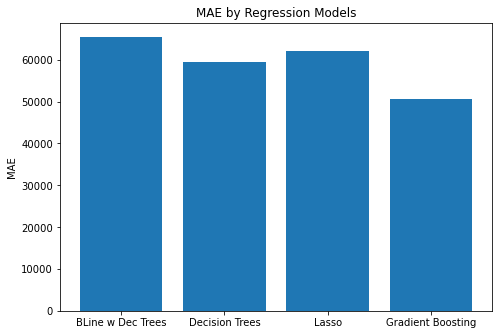

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['BLine w Dec Trees', 'Decision Trees', 'Lasso', 'Gradient Boosting']
mae = [bdtr,dtr,las,gbr]
ax.bar(models,mae)
ax.set_ylabel('MAE')
ax.set_title('MAE by Regression Models')
plt.show()

Gradient boosting performs the best with our dataset when it is paired with our new, engineered features.

## Conclusion

As we can see, affluent communities in the Fresno area are built away from freeways and benefit from public policy (such as Jessica's Law). In Fresno, there is a strong negative correlation between the number of sexual offenders living in the area and the average price a home was sold in the same area. Furthermore, zipcodes that had an abundant number of parks had a positive correlation with the average price a home was sold in the area.

Because this data was scraped using a custom script and an API, the dataset was inconsistent. I wanted to scrape housing data in order to obtain the data for free - housing price data should be available for the public without a paywall. In order to better asess housing data by zipcode, consistent and accurate data is needed. In the future, I hope to obtain an accurate dataset to do exploratory analysis on in order to allow homebuyers to make decisions that are backed by data.